In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
combined_data = pd.read_csv('data/combined_data/cleaned_data.csv')

In [23]:
combined_data.describe()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,24.041555,29.995298,19.800576,66.899232,4.168119,6.492610,4.835125,9.064779,118.738399
std,2.132947,2.915039,2.077694,15.851024,15.789339,0.755011,2.668775,6.227488,85.945068
min,19.000000,21.600000,12.300000,21.000000,0.000000,3.500000,0.200000,1.900000,2.095238
25%,22.500000,28.000000,18.600000,57.000000,0.000000,6.300000,3.000000,5.400000,48.854167
50%,23.700000,29.500000,20.200000,70.000000,0.000000,6.900000,4.300000,7.600000,95.083333
75%,25.300000,32.075000,21.000000,79.000000,1.020000,6.900000,6.300000,11.100000,166.906250
max,30.400000,37.200000,24.600000,98.000000,361.190000,9.200000,14.800000,81.300000,461.913043


In [3]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,21.0,27.6,14.6,61.0,0.0,6.0,2.2,3.5,284.795833
1,21.6,27.7,17.0,59.0,0.0,6.8,2.0,3.5,239.695455
2,22.3,29.0,16.1,48.0,0.0,6.9,2.8,3.5,182.187500
3,20.9,29.0,16.0,66.0,0.0,5.5,2.2,3.5,264.064286
4,20.9,27.8,16.0,62.0,0.0,6.3,3.0,5.4,223.208333


In [4]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# DECISION TREE

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='friedman_mse')
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [7]:
f'Coefficient of determination R^2 on train set {tree.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [8]:
f'Coefficient of determination R^2 on test set {tree.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set -0.11948562331269508'

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, X, y, cv = 3)

In [10]:
score.mean()

-0.2872662194699977

In [11]:
pred = tree.predict(X_test)

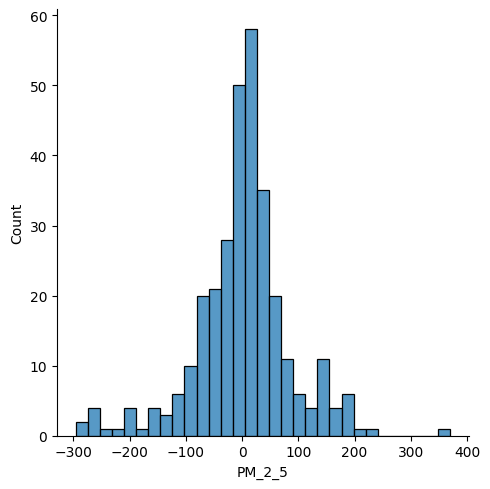

In [12]:
sns.displot(y_test - pred)

# HYPERPARAMETER TUNING

In [13]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_leaf': list(range(1,6)),
    'min_weight_fraction_leaf': [i/10 for i in range(1, 5)],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]
}

In [14]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(tree, params, scoring='neg_mean_squared_error', cv=5)
search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(criterion='friedman_mse'),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [15]:
search.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [16]:
search.best_score_

-4890.788825812214

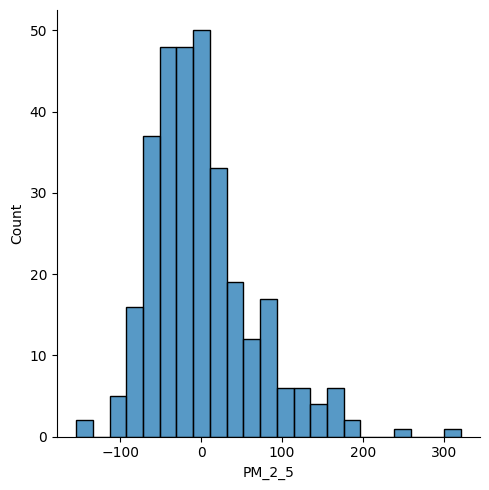

In [17]:
pred = search.predict(X_test)
sns.displot(y_test-pred)

In [18]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 48.11416908398254
Mean Sq Error: 4149.651281547419
Root Mean Error: 64.4177869966628


In [19]:
search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      max_features='log2', max_leaf_nodes=10,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1)

In [20]:
import pickle
pickle.dump(search, open('d-tree.pkl', 'wb'))

# Accuracy

In [21]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.25%
